In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [3]:
sp=pd.read_csv("50_Startups.csv")

In [4]:
sp.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
sp.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
sp.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
df=pd.DataFrame(sp)

In [8]:
df=df.drop("State",1)

In [9]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


{'whiskers': [<matplotlib.lines.Line2D at 0x29143a45640>,
 'caps': [<matplotlib.lines.Line2D at 0x29143a45d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x29143a452e0>],
 'medians': [<matplotlib.lines.Line2D at 0x29143a53400>],
 'fliers': [<matplotlib.lines.Line2D at 0x29143a53700>],
 'means': []}

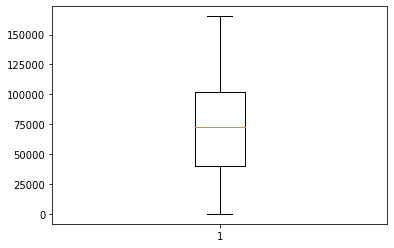

In [10]:
plt.boxplot(df["R&D Spend"])

{'whiskers': [<matplotlib.lines.Line2D at 0x2914337d070>,
 'caps': [<matplotlib.lines.Line2D at 0x2914326f340>,
 'boxes': [<matplotlib.lines.Line2D at 0x29143aad970>],
 'medians': [<matplotlib.lines.Line2D at 0x29143ac0ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29143ac0dc0>],
 'means': []}

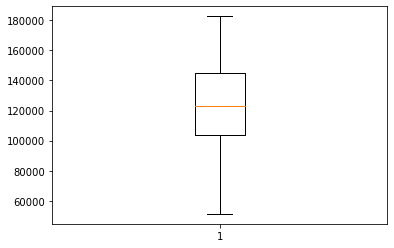

In [11]:
plt.boxplot(df["Administration"])

{'whiskers': [<matplotlib.lines.Line2D at 0x29143b2ecd0>,
 'caps': [<matplotlib.lines.Line2D at 0x29143b3a3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29143b2e970>],
 'medians': [<matplotlib.lines.Line2D at 0x29143b3aa90>],
 'fliers': [<matplotlib.lines.Line2D at 0x29143b3ad90>],
 'means': []}

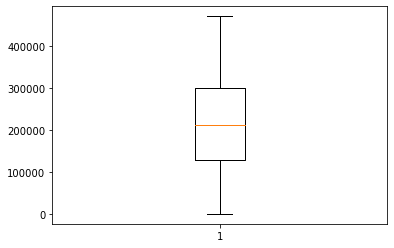

In [12]:
plt.boxplot(df["Marketing Spend"])

{'whiskers': [<matplotlib.lines.Line2D at 0x29143b87f10>,
 'caps': [<matplotlib.lines.Line2D at 0x29143b94610>,
 'boxes': [<matplotlib.lines.Line2D at 0x29143b87bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x29143b94cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29143b94fd0>],
 'means': []}

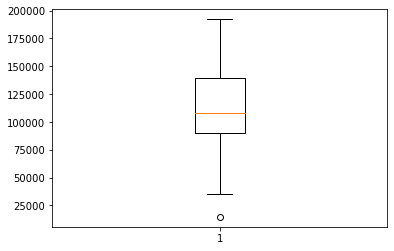

In [13]:
plt.boxplot(df["Profit"])

In [14]:
df=df.rename(columns={"R&D Spend":"rdspend"})

In [15]:
df=df.rename(columns={"Marketing Spend":"marketingspend"})

In [16]:
df.head()

,rdspend,Administration,marketingspend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [17]:
# Correlation matrix 
df.corr()

,rdspend,Administration,marketingspend,Profit
rdspend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
marketingspend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [18]:
import seaborn as sns


Index(['rdspend', 'Administration', 'marketingspend', 'Profit'], dtype='object')

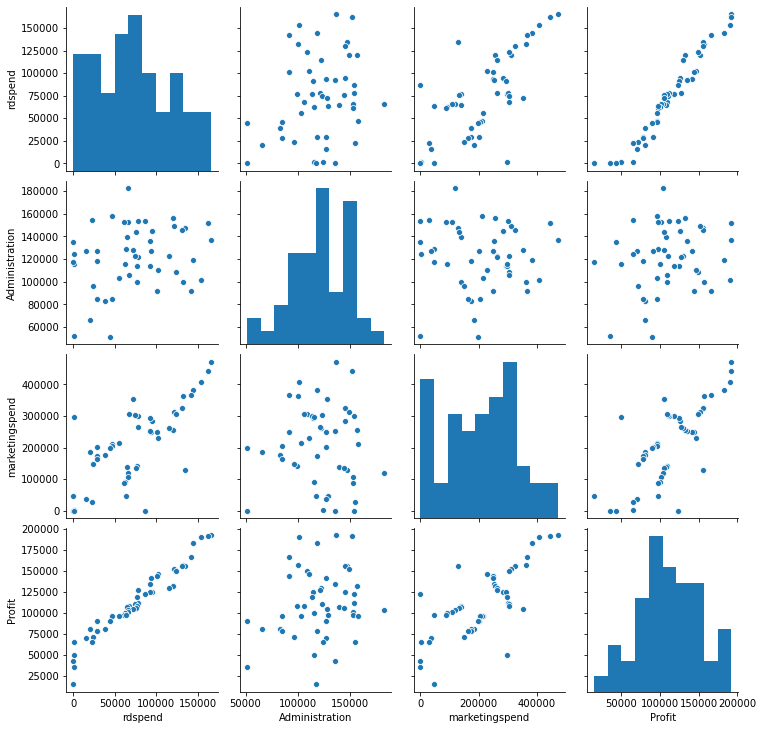

In [19]:
sns.pairplot(df)
df.columns

In [20]:
#preparing model considering all the variables 
import statsmodels.formula.api as smf # for regression model

In [21]:
# Preparing model                  
ml1 = smf.ols('Profit~rdspend+Administration+marketingspend',data=df).fit() # regression model


In [22]:
# Getting coefficients of variables               
ml1.params


Intercept         50122.192990
rdspend               0.805715
Administration       -0.026816
marketingspend        0.027228
dtype: float64

In [23]:
# Summary
ml1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 06 Jan 2021   Prob (F-statistic):           4.53e-30
Time:                        00:00:28   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
rdspend            0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
marketingspend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Here Administration variable  coliniarity to the marketing spend so ignore that as the input variable 

In [24]:
ml_v=smf.ols('Profit~Administration',data = df).fit()  
ml_v.summary()
# p-value >0.05 .. It is insignificant 



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Wed, 06 Jan 2021   Prob (F-statistic):              0.162
Time:                        00:00:28   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
# Preparing model based only on WT
ml_w=smf.ols('Profit~marketingspend',data = df).fit()  
ml_w.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Wed, 06 Jan 2021   Prob (F-statistic):           4.38e-10
Time:                        00:00:28   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept           6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
marketingspend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
# Preparing model based only on WT & VOL
ml_wv=smf.ols('Profit~Administration+marketingspend',data = df).fit()  
ml_wv.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Wed, 06 Jan 2021   Prob (F-statistic):           2.50e-10
Time:                        00:00:28   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Administration     0.3237      0.131      2.468      0.017       0.060       0.588
marketingspend     0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

if seperate i will build a model ,my Administation variable model p value is >0.05 so insignificant , for marketingspend variable model p value is <0.05,incase both the variables my model p value is <0.05

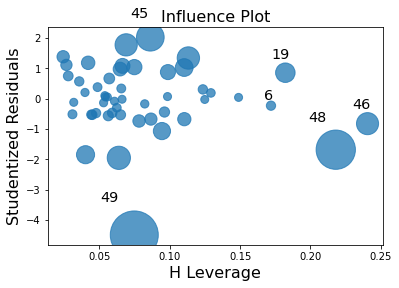

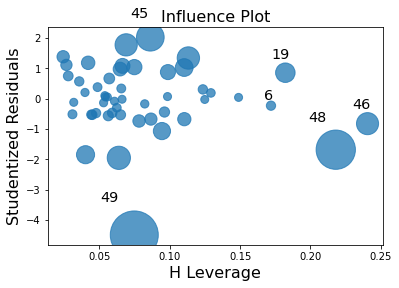

In [27]:
import statsmodels.api as sm
sm.graphics.influence_plot(ml1)

In [28]:
df_new=df.drop(df.index[[48,49]],axis=0)

In [29]:
ml_new = smf.ols('Profit~rdspend+Administration+marketingspend',data = df_new).fit()    

# Getting coefficients of variables        
ml_new.params

# Summary
ml_new.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Wed, 06 Jan 2021   Prob (F-statistic):           2.03e-31
Time:                        00:00:46   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        5.91e+04   5916.711      9.988      0.000    4.72e+04     7.1e+04
rdspend            0.7895      0.036     21.718      0.000       0.716       0.863
Administration    -0.0633      0.044     -1.442      0.156      -0.152       0.025
marketingspend     0.0169      0.014      1.249      0.218      -0.010       0.044
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Influence rows i will remove and build a model also p value for both the Administation,marketing spend is > 0.05 

In [30]:
profit_pred = ml_new.predict(df_new[['rdspend','Administration','marketingspend']])
profit_pred

df_new.head()

,rdspend,Administration,marketingspend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [31]:
rsq_rdspeed = smf.ols('rdspend~Administration+marketingspend',data=df_new).fit().rsquared  
vif_rdspeed = 1/(1-rsq_rdspeed) # 2.25
print(vif_rdspeed)


2.2509719174188128


In [32]:
rsq_ad = smf.ols('Administration~marketingspend+rdspend',data=df_new).fit().rsquared  
vif_ad = 1/(1-rsq_ad) # 1.196
print(vif_ad)

1.1960162915170802


In [33]:

rsq_mar = smf.ols('marketingspend~Administration+rdspend',data=df_new).fit().rsquared  
vif_mar = 1/(1-rsq_mar) #  2.22
print(vif_mar)

2.229867174093624


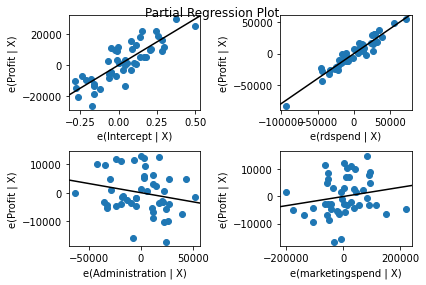

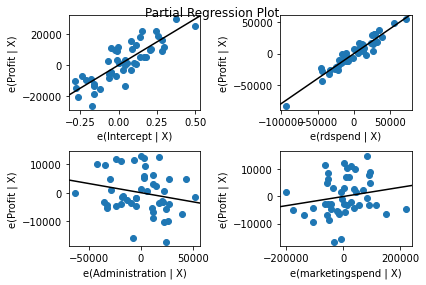

In [34]:
sm.graphics.plot_partregress_grid(ml_new)

Text(0, 0.5, 'fitted_values')

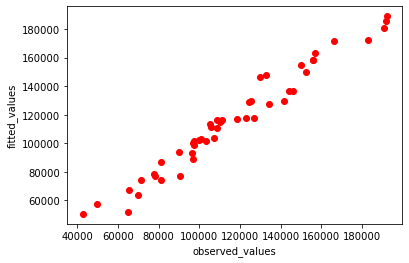

In [35]:
plt.scatter(df_new.Profit,profit_pred,c="r");plt.xlabel("observed_values");plt.ylabel("fitted_values")

vif value for all my input varibles are less than 10 only so i will consider all 3 variables 

In [36]:
ml_new1 = smf.ols('Profit~rdspend+Administration',data = df_new).fit()    

# Getting coefficients of variables        
ml_new1.params

# Summary
ml_new1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     559.7
Date:                Wed, 06 Jan 2021   Prob (F-statistic):           1.62e-32
Time:                        00:00:48   Log-Likelihood:                -494.17
No. Observations:                  48   AIC:                             994.3
Df Residuals:                      45   BIC:                             1000.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       6.273e+04   5182.210     12.106      0.000    5.23e+04    7.32e+04
rdspend            0.8229      0.025     33.245      0.000       0.773       0.873
Administration    -0.0837      0.041     -2.041      0.047      -0.166      -0.001
==============================================================================
Omnibus:                        0.197   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.396
Skew:                           0.073   Prob(JB):                        0.820
Kurtosis:                       2.580   Cond. No.                     7.24e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## P value less Than 0.05 and R^2 Value is 0.961

## Here marketing spend variable  coliniarity to the administration  so ignore that as the input variable 
## consider only independent variable as R.D. spend and administration  
## Conclusion: if we want to Predict the Profit for 50 startup the independent variables consideration is R.D.Spend and Administaration